# Autoencoder Multiivariate Training Autoencoders and PCA for One Day of POD data




------

In [3]:
pwd

'/root/eks-ml-pipeline/eks_ml_pipeline'

## Imports

In [4]:
# !pip install -r /root/eks-ml-pipeline/modeling/kad/kad/requirements.txt
# # # !pip install keras
# # # !pip install tensorflow

In [5]:
# !pip install tensorflow

In [6]:
# import matplotlib as mpl
# mpl.rcParams.keys()

In [7]:
# !pip install --upgrade matplotlib

In [8]:
!pip uninstall -y msspackages

Keyring is skipped due to an exception: 'keyring.backends'


In [9]:
!pip install /root/msspackages/dist/msspackages-0.0.7-py3-none-any.whl

Keyring is skipped due to an exception: 'keyring.backends'
Processing /root/msspackages/dist/msspackages-0.0.7-py3-none-any.whl
  Using cached configparser-5.3.0-py3-none-any.whl (19 kB)
  Using cached pyspark-3.3.1-py2.py3-none-any.whl
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)


In [10]:
from msspackages import setup_runner
setup_runner()

b"Get:1 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]\nGet:2 http://deb.debian.org/debian buster InRelease [122 kB]\nGet:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]\nGet:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [412 kB]\nGet:5 http://deb.debian.org/debian buster/main amd64 Packages [7909 kB]\nGet:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8788 B]\nFetched 8543 kB in 1s (6496 kB/s)\nReading package lists...\nBuilding dependency tree...\nReading state information...\n55 packages can be upgraded. Run 'apt list --upgradable' to see them.\nReading package lists...\nBuilding dependency tree...\nReading state information...\nThe following NEW packages will be installed:\n  sudo\n0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.\nNeed to get 1244 kB of archives.\nAfter this operation, 3883 kB of additional disk space will be used.\nGet:1 http://security.debian.org/

In [11]:
!python3 -m pip install -r requirements.txt

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached protobuf-3.19.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.51.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Usi

In [12]:
from msspackages import Pyspark_data_ingestion
from pyspark import StorageLevel
from pyspark.sql.functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set(color_codes=True)
from numpy.random import seed
import tensorflow as tf



from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
#pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
# %%time
# from msspackages import Pyspark_data_ingestion
# pod_obj = Pyspark_data_ingestion(year = '2022', month = '10', day = '10', hour = -1, filter_column_value ='Pod',setup='128gb')
# spark = pod_obj.get_spark()
# err, pod_data = pod_obj.read()
# pod_data = pod_data.select(*pod_data.columns,get_json_object(col("kubernetes"),"$.pod_id").alias("pod_id"))

# features_list =  ['Timestamp','pod_id','pod_status','pod_memory_utilization','pod_network_total_bytes','pod_cpu_utilization']
# pod_data = pod_data.select(features_list)

# pod_data.write.parquet("pod_data_one_day.parquet")


In [14]:
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import json
import sys
import statsmodels.api as sm
import os
import keras
from keras import layers
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from models import autoencoder_model_dish_5g

from sklearn.model_selection import train_test_split



In [15]:
pd.set_option('display.max_rows', None)

First lets read in our training sample set 

In [18]:
import pandas as pd

training_df_full = pd.read_parquet('pod_data_one_day.parquet')

In [19]:
training_df_full.head()

,Timestamp,pod_id,pod_status,pod_memory_utilization,pod_network_total_bytes,pod_cpu_utilization
0,1665413960444,dd5f7368-44d0-42e6-8862-f306acaca4a9,Running,0.030798,3.003854e+04,0.047314
1,1665413967122,dcc12d82-64ca-4e78-83d1-354d0dccc838,Running,0.175907,2.425773e+03,0.002205
2,1665413969770,f0f216ae-3ebe-4a8c-a1d8-1a6728d8b32e,Running,0.201239,1.530957e+03,0.003732
3,1665413961335,6c4e2304-26e4-4838-9461-bbb3829f4c2f,Running,0.036943,1.834399e+06,0.004596
4,1665413960723,94f65baf-b7a2-4a93-85a8-ac65f0e0c5b9,Running,0.169697,1.556154e+03,0.022813


In [20]:
pod_df=training_df_full.query("pod_status == 'Running'")

In [21]:
pod_df.shape

(15892622, 6)

In [22]:
pod_df['pod_id'].nunique()

13192

In [23]:
columns_to_keep = ['Timestamp','pod_id','pod_memory_utilization','pod_network_total_bytes','pod_cpu_utilization']

In [24]:
# training_df_full = training_df_full.drop(training_df_full.columns.difference(columns_to_keep),1, inplace=False)
pod_df['Timestamp'] = pd.to_datetime(pod_df['Timestamp'], unit='ms')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
pod_df.head()

,Timestamp,pod_id,pod_status,pod_memory_utilization,pod_network_total_bytes,pod_cpu_utilization
0,2022-10-10 14:59:20.444,dd5f7368-44d0-42e6-8862-f306acaca4a9,Running,0.030798,3.003854e+04,0.047314
1,2022-10-10 14:59:27.122,dcc12d82-64ca-4e78-83d1-354d0dccc838,Running,0.175907,2.425773e+03,0.002205
2,2022-10-10 14:59:29.770,f0f216ae-3ebe-4a8c-a1d8-1a6728d8b32e,Running,0.201239,1.530957e+03,0.003732
3,2022-10-10 14:59:21.335,6c4e2304-26e4-4838-9461-bbb3829f4c2f,Running,0.036943,1.834399e+06,0.004596
4,2022-10-10 14:59:20.723,94f65baf-b7a2-4a93-85a8-ac65f0e0c5b9,Running,0.169697,1.556154e+03,0.022813


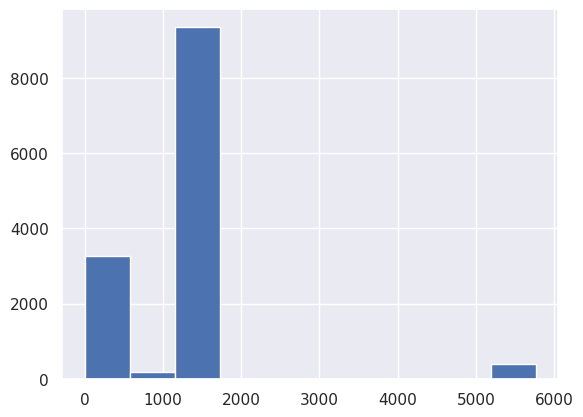

In [26]:
pod_df.groupby('pod_id')['Timestamp'].count().hist()

In [27]:
pods_by_count = pod_df.groupby('pod_id')['Timestamp'].count() 
count_filter_1 = (pods_by_count >= 1080)
count_filter_2 = (pods_by_count <= 1800)

# get a list of pods with the right length 
ok_pod_list = pods_by_count[count_filter_1 & count_filter_2].index #.sample(1_000, replace=True).index

-----

In [28]:
len(ok_pod_list)

9362

In [29]:
## for normalization
scaler = StandardScaler()

In [30]:
import random 
features = ['pod_cpu_utilization','pod_memory_utilization','pod_network_total_bytes']

In [32]:
# training_df = 
ok_pod_filter = pod_df['pod_id'].isin(ok_pod_list)
training_df = pod_df[ ok_pod_filter ][['Timestamp'] + ['pod_id']+features]

In [35]:
%%time


def make_df_for_pod(pod):
    pod_filter = (training_df.pod_id == pod)
    return     training_df[ pod_filter ].sort_values(by='Timestamp').reset_index(drop=True)


    
pod_dfs = [ make_df_for_pod(pod) for pod in training_df['pod_id'].unique()] 



CPU times: user 1h 47min, sys: 3.43 s, total: 1h 47min 3s
Wall time: 1h 46min 58s


In [36]:
with open('pod_dfs.npy', 'wb') as f:
    np.save(f, pod_dfs)

/opt/conda/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [38]:
pod_dfs[0].head()

,Timestamp,pod_id,pod_cpu_utilization,pod_memory_utilization,pod_network_total_bytes
0,2022-10-10 00:00:22.562,48c12519-2acb-43c4-b9ba-5176fdf40abc,0.256547,0.772662,3268.285149
1,2022-10-10 00:01:31.528,48c12519-2acb-43c4-b9ba-5176fdf40abc,0.256738,0.775199,2862.815423
2,2022-10-10 00:02:25.422,48c12519-2acb-43c4-b9ba-5176fdf40abc,0.255896,0.772334,2844.869761
3,2022-10-10 00:03:23.431,48c12519-2acb-43c4-b9ba-5176fdf40abc,0.258694,0.772484,2770.950191
4,2022-10-10 00:04:23.847,48c12519-2acb-43c4-b9ba-5176fdf40abc,0.262699,0.772380,2818.176754


In [30]:
##global variable

time_steps = 20
batch_size = 16
n_samples = batch_size*1000 #000

In [31]:
%%time
#initializing for training set
x_train = np.zeros((n_samples,time_steps,len(features)))

for b in range(n_samples):
    ##pick random df, and normalize
    df = random.choice(pod_dfs)
    df = df.dropna()

    df = df.drop(columns = ['pod_id'])
    df = df.set_index('Timestamp')
    df = df.sort_index()
    
    ##make sure length of df is atleast 40
    if len(df) >= 40 :
        df = scaler.fit_transform(df[['pod_cpu_utilization','pod_memory_utilization','pod_network_total_bytes']])
        sample = np.zeros((n_samples,time_steps,len(features)))
        
        first_time = random.choice(range(len(df)-time_steps))
        sample = df[first_time:first_time+time_steps]
        x_train[b] = sample
  
    else:
        print('This never hapens')
        continue
        
# x_train[159,:,0]

CPU times: user 1min 13s, sys: 108 ms, total: 1min 13s
Wall time: 1min 13s


# Training for 10000 Pods in one day with parameters 

time_steps = 20
batch_size = 16
n_samples = batch_size*1000 #000

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              135168    
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 20, 256)          0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 20, 256)          394240    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 20, 3)            771       
 ibuted)                                                         
                                                                 
Total params: 530,179
Trainable params: 530,179
Non-trai

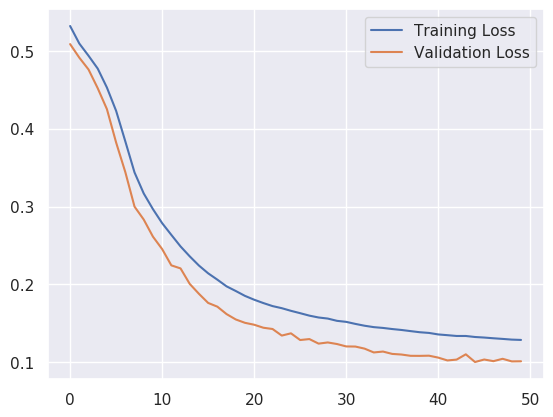

500/500 [==============================] - 6s 10ms/step


In [32]:
from models import autoencoder_model_dish_5g
model = autoencoder_model_dish_5g(batch_size = batch_size, 
                                  time_steps = time_steps,
                                  learning_rate=0.001,
                                  validation_split=.1, 
                                  epochs=100, 
                                  nuerons = 128, 
                                  dropout_rate=.1
                                 )
model.fit(x_train)

In [34]:
with open('train.npy', 'wb') as f:
    np.save(f, x_train)

In [39]:
##global variable

time_steps = 20
batch_size = 32
n_samples = batch_size*1000 #000

In [40]:
%%time
#initializing for training set
x_train = np.zeros((n_samples,time_steps,len(features)))

for b in range(n_samples):
    ##pick random df, and normalize
    df = random.choice(pod_dfs)
    df = df.dropna()

    df = df.drop(columns = ['pod_id'])
    df = df.set_index('Timestamp')
    df = df.sort_index()
    
    ##make sure length of df is atleast 40
    if len(df) >= 40 :
        df = scaler.fit_transform(df[['pod_cpu_utilization','pod_memory_utilization','pod_network_total_bytes']])
        sample = np.zeros((n_samples,time_steps,len(features)))
        
        first_time = random.choice(range(len(df)-time_steps))
        sample = df[first_time:first_time+time_steps]
        x_train[b] = sample
  
    else:
        print('This never hapens')
        continue
        
# x_train[159,:,0]

CPU times: user 2min 36s, sys: 15.9 ms, total: 2min 36s
Wall time: 2min 36s


In [ ]:
with open('train_20_32_10000.npy', 'wb') as f:
    np.save(f, x_train)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 256)              135168    
 nal)                                                            
                                                                 
 repeat_vector_3 (RepeatVect  (None, 20, 256)          0         
 or)                                                             
                                                                 
 bidirectional_7 (Bidirectio  (None, 20, 256)          394240    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 3)            771       
 tributed)                                                       
                                                                 
Total params: 530,179
Trainable params: 530,179
Non-tr

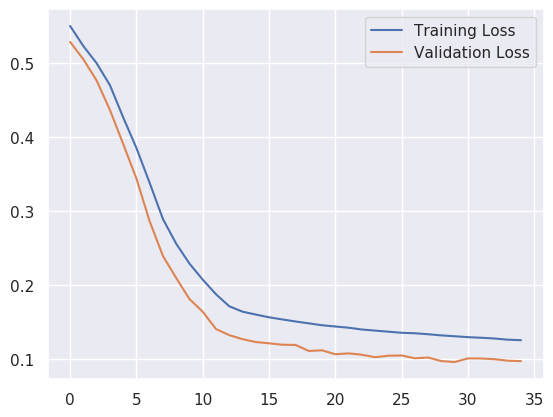

1000/1000 [==============================] - 12s 11ms/step


In [85]:
from models import autoencoder_model_dish_5g
model = autoencoder_model_dish_5g(batch_size = batch_size, 
                                  time_steps = time_steps,
                                  learning_rate=0.001,
                                  validation_split=.1, 
                                  epochs=100, 
                                  nuerons = 128, 
                                  dropout_rate=.1
                                 )
model.fit(x_train)

In [86]:
x_train.shape

(32000, 20, 3)

In [88]:
maes = 0
for i in range(3):
    maes += median_absolute_error(x_train[:,:,i], model.results[:,:,i])
    
ae_train_loss  = (maes)/3
ae_train_loss

0.06948142003292579

In [54]:
from sklearn.metrics import median_absolute_error

In [23]:
# model: i_model.IModel = autoencoder_model.AutoEncoderModel(batch_size = batch_size, time_steps = time_steps)

# PCA

In [66]:
from models import pca_ad_dish_5g

In [67]:
x_train.shape

(32000, 20, 3)

In [70]:
pca = pca_ad_dish_5g(num_of_features =x_train.shape[2], 
                                    number_of_temporal_slices = 1, 
                                    timesteps_per_slice = x_train.shape[1], 
                                    n_modes_to_delete=1
                                   )

In [73]:
pca.train(x_train)

(array([[[ 6.20596635e-03, -1.69570878e-02,  4.62025333e-01],
         [-1.23397154e-02,  2.90122021e-02,  4.64030062e-01],
         [-2.85522201e-02, -2.11471795e-02, -1.57763859e-01],
         ...,
         [-1.08944789e-02,  4.08991169e-02, -5.98713351e-02],
         [ 2.41640651e-02, -4.89383640e-02,  6.43154539e-01],
         [ 2.26215946e-02,  3.16563817e-02,  6.16988663e-01]],
 
        [[-8.48222565e-03,  1.81307922e-02, -2.12182576e-01],
         [ 1.68657457e-02, -3.10203151e-02, -2.13103237e-01],
         [ 3.90247643e-02,  2.26109060e-02,  7.24521785e-02],
         ...,
         [ 1.48904173e-02, -4.37299965e-02,  2.74955791e-02],
         [-3.30270970e-02,  5.23256894e-02, -2.95365161e-01],
         [-3.09188706e-02, -3.38475147e-02, -2.83348627e-01]],
 
        [[-2.22709519e-02, -1.83910200e-03,  1.40255842e-01],
         [ 4.42827422e-02,  3.14655440e-03,  1.40864413e-01],
         [ 1.02463514e-01, -2.29354361e-03, -4.78919689e-02],
         ...,
         [ 3.90963151e

In [74]:
pca.vs[0].shape
last_right_principal_vector = pca.vs[0][:,-1]

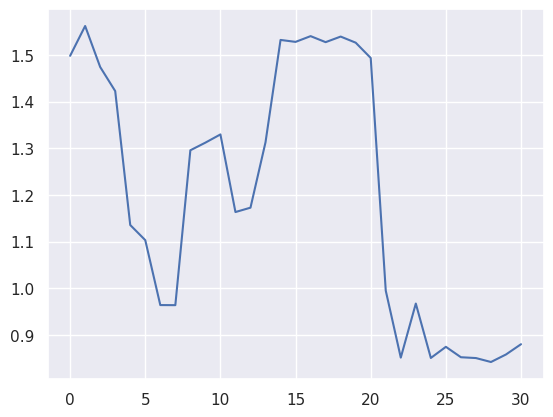

In [75]:
last_right_principal_vectors = []
for q in range(1_000 , 
               x_train.shape[0] , 
               1_000):
    residuals_reshaped, ed_errors, encode_decode_maps = pca.train(x_train[:q])
    last_right_principal_vectors.append( pca.vs[0][:,-1])
    

angles = [ np.min([np.arccos(np.matmul(vector.T,last_right_principal_vector)),
                np.arccos(np.matmul(vector.T, - last_right_principal_vector)) ])for vector in last_right_principal_vectors]

plt.plot(angles)
plt.show();

The direction of the last principal vector is settling down to the direction determined by having 16,000 samples. 

In [144]:
residuals_reshaped.shape

(16000, 20, 3)

In [169]:
pca_train_loss = ed_errors.mean()/20
pca_train_loss, 0.096687

(0.10311449907328027, 0.096687)

In [146]:
encode_decode_maps[0].shape

(20, 20)

# TEST DATASET: Build out Dataset for testing on one pod

In [63]:
# testing_df = pod_df[~pod_df['pod_id'].isin(upods)]

# testing_df.head()
# ## drop the pod_id
# test_df = test_df.drop("pod_id",1, inplace=False)


# ##set timestamp as the index
# test_df = test_df.set_index('Timestamp')

# ##normalize test_df 
# test_df = scaler.fit_transform(test_df.values)


# ##ensure the data is sorted!!
# test_df = test_df.sort_index()

### Then we test

In [25]:
# predictions = []
# anomaly_scores = []

# for i in range(0,len(test_df),12*5):
#     if(i + 12*5 < len(test_df)):
#         sample_topredict_on = test_df.iloc[i:i+12*5]
# #         display(sample_topredict_on)
#         x_test = np.array(sample_topredict_on['pod_cpu_utilization'].tolist())
#         x_test = x_test.reshape(1,-1,1)
#         preds,anom_scores = model.testnew(x_test)
#         predictions.append(preds)
#         anomaly_scores.append(anom_scores)




predictions = []
anomaly_scores = []
errors = []
for i in range(0,len(test_df),timesteps):
    if(i + timesteps < len(test_df)):
        sample_topredict_on = test_df.iloc[i:i+timesteps]
#         display(sample_topredict_on)
        x_test = np.array(sample_topredict_on['pod_cpu_utilization'].tolist())
        x_test = x_test.reshape(1,-1,1)
        preds,errs,anom_scores = model.test(x_test)
        predictions.append(preds)
        errors.append(errs)
        anomaly_scores.append(anom_scores)

1/1 [==============================] - 0s 21ms/step


In [26]:
anomaly_scores = np.concatenate(np.concatenate(anomaly_scores,axis=0),axis=0)
errors = np.concatenate(np.concatenate(errors,axis=0),axis=0)
predictions = np.concatenate(np.concatenate(predictions,axis=0),axis=0)

df_results = test_df.iloc[0:len(anomaly_scores)]
df_results['predictions'] = predictions
df_results['error'] = errors
df_results['anom_score'] = anomaly_scores

def anom_threshold_function(x):
    if(x > 0.8): return True
    else: return False

df_results['is_anomaly'] = df_results['anom_score'].apply(anom_threshold_function)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

/root/eks-ml-pipeline/modeling/autoencoder_model_dish_5g.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df[ANOMALIES_COLUMN] = results_df[ANOMALIES_COLUMN].fillna(False)


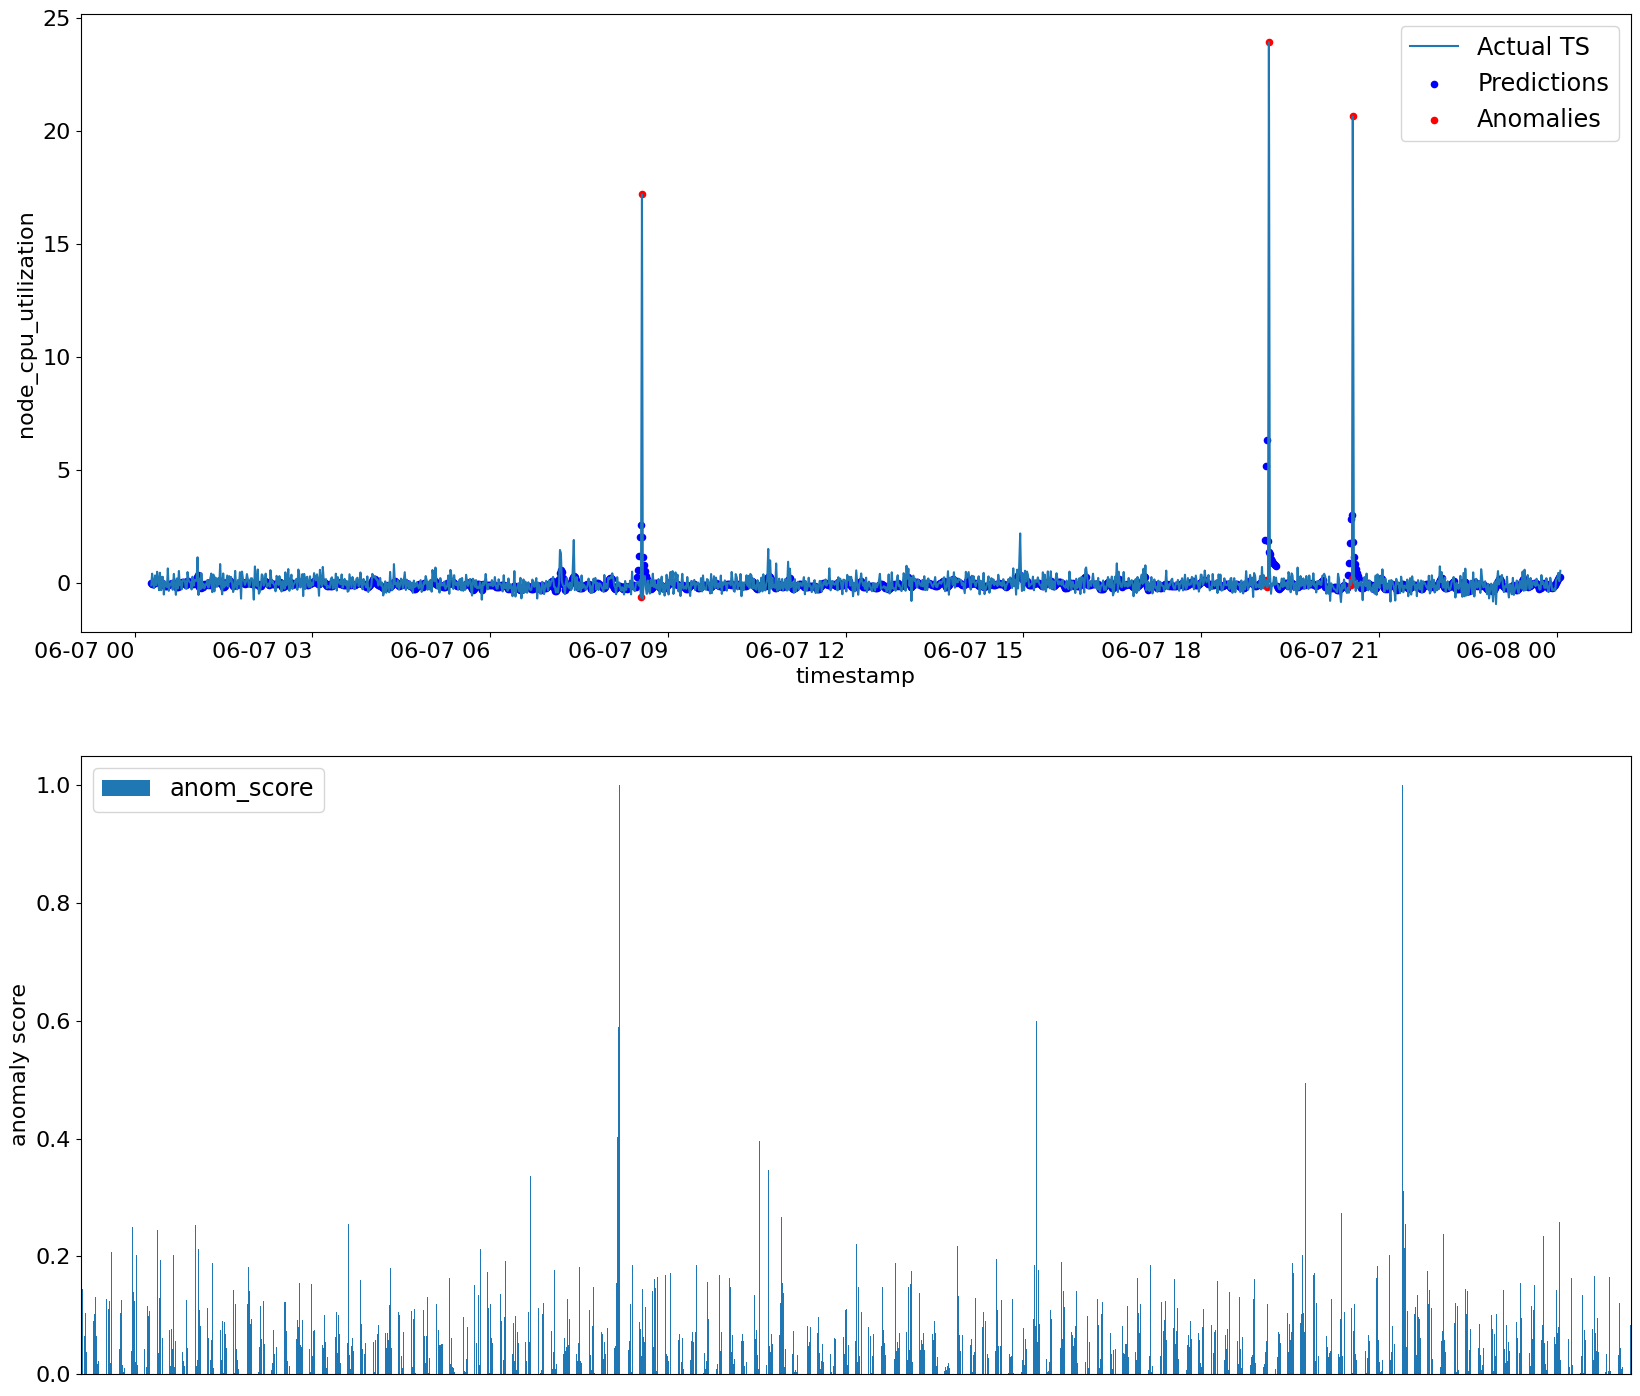

In [28]:

model.visualize(df_results, "pod_cpu_utilization")
plt.show()

In [ ]:
model.visualize(df_results, "pod_memory_utilization")
plt.show()

In [ ]:
model.visualize(df_results, "pod_memory_utilization")
plt.show()

In [ ]:
model.visualize(df_results, "pod_network_total_bytes")
plt.show()